<a href="https://colab.research.google.com/github/b369rahul/CL643_project/blob/master/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview
   This project is to predict the if a invest should be made or not on a plant based on various parameters
   

# Importing Libraries

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# ctrl+ space for suggestions

# Loading Dataset

In [80]:
df=pd.read_csv('https://raw.githubusercontent.com/b369rahul/CL643_project/master/Plant%20Size%2CLocation%2CTRL%2CUpgrade%20Fre.csv',delimiter=';')

Random Dataset sample

In [81]:
df.head()

,Plant Size,Location,TRL,Upgrade Frequency(in months),Project Duration(in months),Production Capacity,Production Price(Rs per unit),Selling Price(Rs per unit),Environmental Impact,Financial Viability
0,Large,Urban,7,6,24,100000,50,75,Low,Yes
1,Medium,Rural,4,5,36,50000,75,100,High,No
2,Small,Suburban,8,2,12,20000,100,150,Medium,Yes
3,Medium,Urban,5,4,18,30000,80,120,Low,No
4,Large,Rural,9,1,36,150000,60,90,High,Yes


## Data Cleaning and Pre processing

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Plant Size                     341 non-null    object
 1   Location                       341 non-null    object
 2   TRL                            341 non-null    int64 
 3   Upgrade Frequency(in months)   341 non-null    int64 
 4   Project Duration(in months)    341 non-null    int64 
 5   Production Capacity            341 non-null    int64 
 6   Production Price(Rs per unit)  341 non-null    int64 
 7   Selling Price(Rs per unit)     341 non-null    int64 
 8   Environmental Impact           341 non-null    object
 9   Financial Viability            341 non-null    object
dtypes: int64(6), object(4)
memory usage: 26.8+ KB


### Checking for null values

In [83]:
df.isnull().sum()

Plant Size                       0
Location                         0
TRL                              0
Upgrade Frequency(in months)     0
Project Duration(in months)      0
Production Capacity              0
Production Price(Rs per unit)    0
Selling Price(Rs per unit)       0
Environmental Impact             0
Financial Viability              0
dtype: int64

We saw that there are no null values

In [84]:
df.describe()

,TRL,Upgrade Frequency(in months),Project Duration(in months),Production Capacity,Production Price(Rs per unit),Selling Price(Rs per unit)
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,5.744868,3.571848,24.475073,65802.052786,81.041056,122.888563
std,1.946946,1.330070,9.646554,60820.901220,26.418878,39.888807
min,2.000000,1.000000,12.000000,3000.000000,35.000000,55.000000
25%,4.000000,3.000000,18.000000,18000.000000,60.000000,90.000000
50%,6.000000,4.000000,24.000000,40000.000000,80.000000,115.000000
75%,7.000000,5.000000,36.000000,100000.000000,100.000000,150.000000
max,10.000000,6.000000,48.000000,300000.000000,170.000000,280.000000


<Axes: ylabel='Financial Viability'>

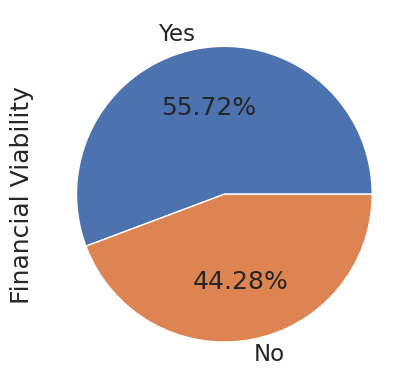

In [85]:
df['Financial Viability'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [86]:
df.duplicated().sum()

58

we saw that there are duplicate entries in this data so we need to remove that

In [87]:
df=df.drop_duplicates()

In [88]:
df.duplicated().sum()

0

now the duplicate entries are removed but the indexing is not consistent so we do that

In [89]:
df.reset_index(drop=True, inplace=True)

### Outlier Detection and Removal

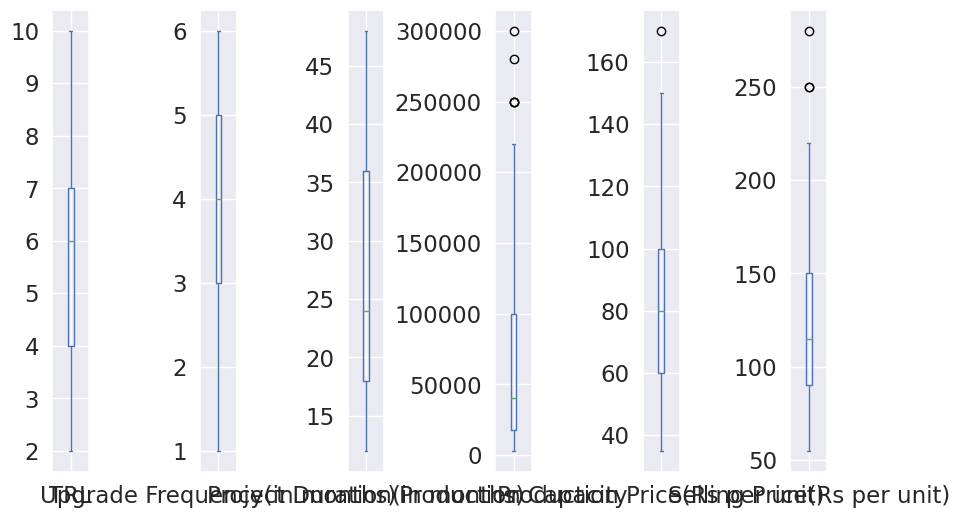

In [90]:
#plt.boxplot(df['TRL',	'Upgrade Frequency(in months)',	'Project Duration(in months)',	'Production Capacity',	'Production Price(Rs per unit)',	'Selling Price(Rs per unit)'])
df.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=3) 
plt.show()

We observe that the dataset in coloumns 'Production Capacity',	'Production Price(Rs per unit)',	'Selling Price(Rs per unit)' has some outliers

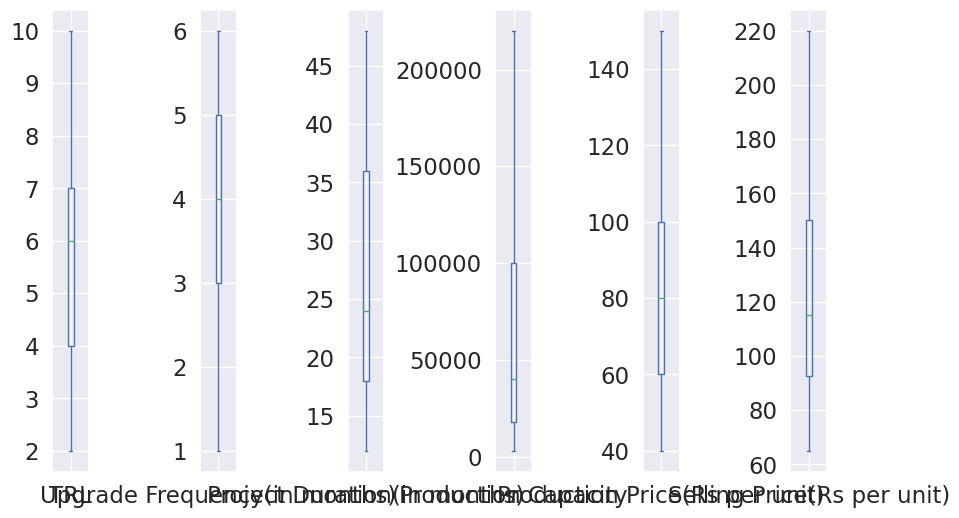

In [91]:
Q1 = np.percentile(df['Production Price(Rs per unit)'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(df['Production Price(Rs per unit)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper=Q3+1.5*IQR
# Lower bound
lower=Q1-1.5*IQR
# Removing the outliers

df.drop(df[df['Production Price(Rs per unit)'] >= upper].index, inplace = True)
df.drop(df[df['Production Price(Rs per unit)'] <=lower].index, inplace = True)



Q1 = np.percentile(df['Production Capacity'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(df['Production Capacity'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper=Q3+1.5*IQR
# Lower bound
lower=Q1-1.5*IQR
# Removing the outliers

df.drop(df[df['Production Capacity'] >= upper].index, inplace = True)
df.drop(df[df['Production Capacity'] <=lower].index, inplace = True)




Q1 = np.percentile(df['Selling Price(Rs per unit)'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(df['Selling Price(Rs per unit)'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1
 
# Upper bound
upper=Q3+1.5*IQR
# Lower bound
lower=Q1-1.5*IQR
# Removing the outliers
df.drop(df[df['Selling Price(Rs per unit)'] >= upper].index, inplace = True)
df.drop(df[df['Selling Price(Rs per unit)'] <=lower].index, inplace = True)




df.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)

# increase spacing between subplots
plt.subplots_adjust(wspace=3) 
plt.show()


Now we see there are no outliers in the current data



In [92]:
df.reset_index(drop=True, inplace=True)

### Correlation Matrix & Heatmap

In [93]:
features = list(df.drop(df.columns[0],axis = 1).columns.values)
df_features = df[features]
corr_matrix = df_features.corr(method = 'pearson')
corr_matrix

,TRL,Upgrade Frequency(in months),Project Duration(in months),Production Capacity,Production Price(Rs per unit),Selling Price(Rs per unit)
TRL,1.000000,-0.303783,0.105578,0.245168,-0.231543,-0.225468
Upgrade Frequency(in months),-0.303783,1.000000,0.090076,-0.043816,0.040295,0.053028
Project Duration(in months),0.105578,0.090076,1.000000,0.492897,-0.518322,-0.500547
Production Capacity,0.245168,-0.043816,0.492897,1.000000,-0.812362,-0.779162
Production Price(Rs per unit),-0.231543,0.040295,-0.518322,-0.812362,1.000000,0.975719
Selling Price(Rs per unit),-0.225468,0.053028,-0.500547,-0.779162,0.975719,1.000000


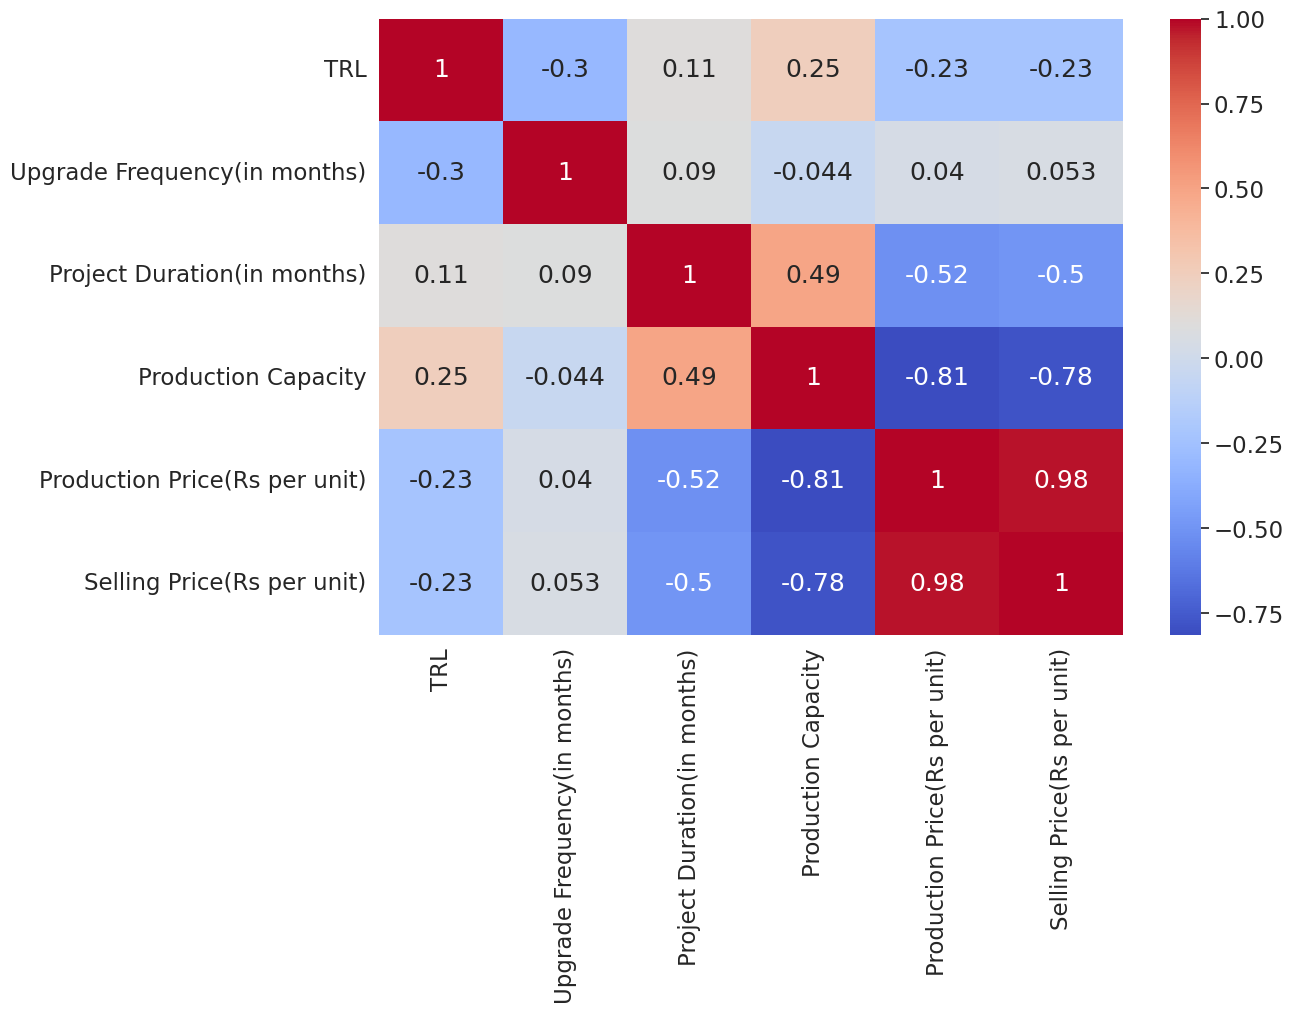

In [94]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
sns.set(font_scale=1.5) 

We saw that some features have good correlation between them, like Project duration , Selling price, Production Capacity, Production Price

### PCA


only numeric data can be used in PCA so we have to choose only those components

In [95]:
a_ = pd.get_dummies(df['Plant Size'], prefix="Size ", prefix_sep="")
b_ = pd.get_dummies(df['Location'], prefix="", prefix_sep="")
c_ = pd.get_dummies(df['Environmental Impact'], prefix="Env Impact ", prefix_sep="")
df = df.drop(["Plant Size"], axis=1)
df = df.drop(["Location"], axis=1)
df = df.drop(["Environmental Impact"], axis=1)
df = pd.concat([a_, b_,c_,df], axis=1)
df.head()

,Size Large,Size Medium,Size Small,Rural,Suburban,Urban,Env Impact High,Env Impact Low,Env Impact Medium,TRL,Upgrade Frequency(in months),Project Duration(in months),Production Capacity,Production Price(Rs per unit),Selling Price(Rs per unit),Financial Viability
0,1,0,0,0,0,1,0,1,0,7,6,24,100000,50,75,Yes
1,0,1,0,1,0,0,1,0,0,4,5,36,50000,75,100,No
2,0,0,1,0,1,0,0,0,1,8,2,12,20000,100,150,Yes
3,0,1,0,0,0,1,0,1,0,5,4,18,30000,80,120,No
4,1,0,0,1,0,0,1,0,0,9,1,36,150000,60,90,Yes


In [96]:
features=df.columns.values.tolist()[0:-1]

# separating features
x = df.loc[:,features]

# separating target
y = df.loc[:,'Financial Viability']

#Standardising features
x = StandardScaler().fit_transform(x)

In [97]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8'])

finaldf= pd.concat([principal_df,df[['Financial Viability']]],axis=1, join='inner')
finaldf=finaldf.replace(['Yes','No'],[1,0])

In [98]:
pca.explained_variance_ratio_.sum()

0.9456393331609061

So by principal component analysis our new components takes into account around 95% of the variance

we tried PCA and obtain the variance with different number of components  and to reduce the components without using generality we use 8 components for PCA

### Final dataframe that contains both non-numeric and PCA components

# Modelling

### Data Splitting in training and testing

In [99]:
features = finaldf.drop(labels=["Financial Viability"], axis=1)
target = finaldf["Financial Viability"]

In [111]:
from sklearn.model_selection import train_test_split

SEED = 0
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=SEED)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8
118,3.396694,0.534835,-0.643197,-1.322541,1.694112,-1.728066,0.905306,-0.520806
182,-2.340011,-2.017858,-1.053858,-0.172153,-0.244122,0.929929,-0.962769,0.268618
214,-0.353668,-0.871455,2.171664,-1.588715,0.624115,0.738013,-1.486830,0.340400
153,2.825162,0.232746,0.753457,1.992662,1.845186,-0.753861,-1.066359,-0.557408
209,0.968068,0.652479,0.192293,2.186677,0.497230,1.040679,0.867280,1.881034
221,1.803322,-1.315715,-0.229020,2.292344,-0.482524,-0.555642,0.087910,1.993760
179,-3.318646,0.753663,0.031269,1.926792,0.943862,0.985407,1.169896,0.399733
15,3.945385,-0.479761,0.872718,0.690939,2.008786,-1.051296,1.762797,-0.092518
225,-2.033633,1.457272,-1.382098,-0.470902,0.282485,0.191294,1.145659,-0.521216
124,2.651954,-0.366100,-1.909152,-0.290921,-0.774719,-1.405527,0.460124,0.336627


## Model Selection

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

Choosing between Logistic regression, SVM, Decision Tree, Random forest by using their accuracy, f-1 score, Area under ROC curve

In [102]:
classifiers=[]

model1 = LogisticRegression()
classifiers.append(model1)

model2 = svm.SVC()
classifiers.append(model2)

model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)

model4 = RandomForestClassifier()
classifiers.append(model4)

for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    classifiers.append(model)

In [103]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc=roc_auc_score(y_test, y_pred)
    f1=f1_score(y_test,y_pred)
    print("Accuracy, AUC, f1-score  of %s is        %.2f     %.2f    %.2f  "%(clf, acc,auc,f1))
    print("")

Accuracy, AUC, f1-score  of LogisticRegression() is        0.58     0.57    0.63  

Accuracy, AUC, f1-score  of SVC() is        0.67     0.66    0.72  

Accuracy, AUC, f1-score  of DecisionTreeClassifier() is        0.67     0.66    0.72  

Accuracy, AUC, f1-score  of RandomForestClassifier() is        0.64     0.63    0.67  

Accuracy, AUC, f1-score  of KNeighborsClassifier(n_neighbors=1) is        0.65     0.65    0.70  

Accuracy, AUC, f1-score  of KNeighborsClassifier(n_neighbors=2) is        0.60     0.61    0.59  

Accuracy, AUC, f1-score  of KNeighborsClassifier(n_neighbors=3) is        0.69     0.69    0.72  

Accuracy, AUC, f1-score  of KNeighborsClassifier(n_neighbors=4) is        0.62     0.63    0.60  

Accuracy, AUC, f1-score  of KNeighborsClassifier() is        0.65     0.65    0.70  

Accuracy, AUC, f1-score  of KNeighborsClassifier(n_neighbors=6) is        0.65     0.67    0.63  

Accuracy, AUC, f1-score  of KNeighborsClassifier(n_neighbors=7) is        0.60     0.60   

Based on above observation SVC(Support Vector Classifiers) and KNN(with 3 neighbours) give best scores but as SVC is more scalable and can be optimised more with hyper-parameter tuning whereas KNN have been tested for various neghbours, we choose SVC Model for our problem

In [104]:
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

### Model training, testing and hyper parameter tuning

In [105]:
svc=SVC() 

# declare parameters for hyperparameter tuning
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]

fmodel = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

fmodel.fit(X_train, y_train)

# print parameters that give the best results
print('Parameters that give the best results :','\n', (fmodel.best_params_),'\n')

y_pred=fmodel.predict(X_test)

# Accuracy of presented model
acc = accuracy_score(y_test, y_pred)

# Area Under ROC curve 
auc=roc_auc_score(y_test, y_pred)

# F-1 score (because FP and FN are equally important to reduce so giving equal weightage)
f1=f1_score(y_test,y_pred)

print("Accuracy, AUC, f1-score for the tunned SVM model is       %.2f     %.2f    %.2f  "%(acc,auc,f1))

Parameters that give the best results : 
 {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'} 

Accuracy, AUC, f1-score for the tunned SVM model is       0.71     0.70    0.74  


So after all model selection and hyperparameter tuning we get the model with
*   71% accuracy
*   74% f1 score
*   0.70 Area under ROC curve





In [106]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [121]:
#Plant Size	Location	TRL	Upgrade Frequency(in months)	Project Duration(in months)	Production Capacity	Production Price(Rs per unit)	Selling Price(Rs per unit)	Environmental Impact	Financial Viability

import gradio as gr

def output(Plant_Size,	Location,	TRL,	Upgrade_frequency, Duration, Capacity,	Production_price, Selling_Price,	Environment_impact):
  arr=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0];
  if Plant_Size=='Large':
    arr[0]=1
  if Plant_Size=='Medium':
    arr[1]=1
  if Plant_Size== 'Small':
    arr[2]=1
  if Location == 'Rural':
    arr[3]=1
  if Location=='Suburban':
    arr[4]=1
  if Location=='Urban':
    arr[5]=1
  if Environment_impact=='High':
    arr[6]=1
  if Environment_impact=='Low':
    arr[7]=1
  if Environment_impact=='Medium':
    arr[8]=1
  arr[9]=TRL
  arr[10]=Upgrade_frequency
  arr[11]=Duration
  arr[12]=Capacity
  arr[13]=Production_price
  arr[14]= Selling_Price
  given=np.dot(arr,np.transpose(pca.components_))
  dict = {'pc1':[given[0]],
        'pc2':[given[1]],
        'pc3':[given[2]],
        'pc4':[given[3]],
        'pc5':[given[4]],
        'pc6':[given[5]],
        'pc7':[given[6]],
        'pc8':[given[7]],
       }
  df = pd.DataFrame(dict)
  z=fmodel.predict(df)
  if z==1:
    return "YES"
  else :
    return "NO"



demo = gr.Interface(
    fn=output,
    inputs=["text", "text","number","number","number","number","number","number","text"],
    outputs=["text"],
)
demo.launch(share=True)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ad4e3bf221e1c5f4df.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
